## Importing relevant libraries
### a) Numpy and Panda for data processing
### b) Matplotlib and Seaborn for data visualization
### c) RandomizedSearchCV, GridSearchCV for hyperparameter Tuning
### d) Xgboost for algorithm

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import seaborn as sns 
sns.set()

In [2]:
# Reading data from csv file into dataframe
df=pd.read_csv('Train.csv')

In [3]:
# Reading top 5 rows from dataframe
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [4]:
# Setting display of columns to maximum
pd.options.display.max_columns=None

In [5]:
#Checking dataframe for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
Employee_ID                  7000 non-null object
Gender                       7000 non-null object
Age                          6588 non-null float64
Education_Level              7000 non-null int64
Relationship_Status          7000 non-null object
Hometown                     7000 non-null object
Unit                         7000 non-null object
Decision_skill_possess       7000 non-null object
Time_of_service              6856 non-null float64
Time_since_promotion         7000 non-null int64
growth_rate                  7000 non-null int64
Travel_Rate                  7000 non-null int64
Post_Level                   7000 non-null int64
Pay_Scale                    6991 non-null float64
Compensation_and_Benefits    7000 non-null object
Work_Life_balance            6989 non-null float64
VAR1                         7000 non-null int64
VAR2                         6423 non-null fl

In [6]:
# Filling the null values with median of that column to reduce the effect of outliers
df_filled_NaN=df.fillna(df.median())

In [7]:
# Checking the frequecy of each element in the column
df_mean=pd.Series(df_filled_NaN['Compensation_and_Benefits']).value_counts()

In [8]:
# Setting value for each element in the column such that element with maximum frequency will get highest number
df_filled_NaN['Compensation_and_Benefits']=df_filled_NaN['Compensation_and_Benefits'].map({'type2':5,'type3':4,'type4':3,'type0':2,'type1':1})

In [9]:
# Converting Categorical data.
df_filled_NaN['Gender']=df_filled_NaN['Gender'].map({'F':1,'M':0})
# Creating dummies for categorical data
df_dummies_marrital=pd.get_dummies(df_filled_NaN['Relationship_Status'])
df_filled_NaN=df_filled_NaN.join(df_dummies_marrital)
df_filled_NaN_drop=df_filled_NaN.drop('Compensation_and_Benefits',axis=1)
df_filled_NaN_drop=df_filled_NaN_drop.drop('Relationship_Status',axis=1)
df_dummies_home=pd.get_dummies(df_filled_NaN_drop['Hometown'])
df_dummies_unit=pd.get_dummies(df_filled_NaN_drop['Unit'])
df_dummies_decision=pd.get_dummies(df_filled_NaN_drop['Decision_skill_possess'])
df_filled_NaN_drop_drop=df_filled_NaN_drop.join([df_dummies_home,df_dummies_unit,df_dummies_decision])
df_filled_NaN_drop_drop_final=df_filled_NaN_drop_drop.drop(['Hometown','Unit','Decision_skill_possess'],axis=1)

In [10]:
df_filled_NaN_drop_drop_final

,Employee_ID,Gender,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Married,Single,Clinton,Franklin,Lebanon,Springfield,Washington,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Analytical,Behavioral,Conceptual,Directive
0,EID_23371,1,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,EID_18000,0,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,EID_3891,1,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,EID_17492,1,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,EID_22534,1,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,1,23.0,5,4.0,1,20,1,2,6.0,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6996,EID_8387,1,44.0,1,16.0,2,59,0,2,4.0,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6997,EID_8077,1,49.0,3,10.0,1,59,1,2,3.0,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6998,EID_19597,1,47.0,3,24.0,1,21,1,5,8.0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [11]:
#Checking columns names
df_filled_NaN_drop_drop_final.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4',
       'VAR5', 'VAR6', 'VAR7', 'Attrition_rate', 'Married', 'Single',
       'Clinton', 'Franklin', 'Lebanon', 'Springfield', 'Washington',
       'Accounting and Finance', 'Human Resource Management', 'IT',
       'Logistics', 'Marketing', 'Operarions', 'Production', 'Purchasing',
       'Quality', 'R&D', 'Sales', 'Security', 'Analytical', 'Behavioral',
       'Conceptual', 'Directive'],
      dtype='object')

In [12]:
# Rearranging columns sequence
columns_names=['Employee_ID', 'Gender', 'Age', 'Education_Level', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4',
       'VAR5', 'VAR6', 'VAR7', 'Married', 'Single',
       'Clinton', 'Franklin', 'Lebanon', 'Springfield', 'Washington',
       'Accounting and Finance', 'Human Resource Management', 'IT',
       'Logistics', 'Marketing', 'Operarions', 'Production', 'Purchasing',
       'Quality', 'R&D', 'Sales', 'Security', 'Analytical', 'Behavioral',
       'Conceptual', 'Directive','Attrition_rate']

In [13]:
#Assigning new column sequence to data frame
df_filled_NaN_drop_drop_finall= df_filled_NaN_drop_drop_final[columns_names]

In [14]:
df_filled_NaN_drop_drop_finall

,Employee_ID,Gender,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Married,Single,Clinton,Franklin,Lebanon,Springfield,Washington,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Analytical,Behavioral,Conceptual,Directive,Attrition_rate
0,EID_23371,1,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.1841
1,EID_18000,0,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.0670
2,EID_3891,1,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0851
3,EID_17492,1,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0668
4,EID_22534,1,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,1,23.0,5,4.0,1,20,1,2,6.0,3.0,1,0.7516,-0.4537,2.0,3,7,3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.7839
6996,EID_8387,1,44.0,1,16.0,2,59,0,2,4.0,3.0,2,-0.1048,-2.7762,2.0,4,8,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.1055
6997,EID_8077,1,49.0,3,10.0,1,59,1,2,3.0,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.7847
6998,EID_19597,1,47.0,3,24.0,1,21,1,5,8.0,2.0,4,0.7516,1.8688,2.0,3,6,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.4162


## Feature selection using heatmap

In [15]:
# Setting X and Y for checking of correlation
X=df_filled_NaN_drop_drop_finall.iloc[:,1:-1]
Y=df_filled_NaN_drop_drop_finall.iloc[:,-1]

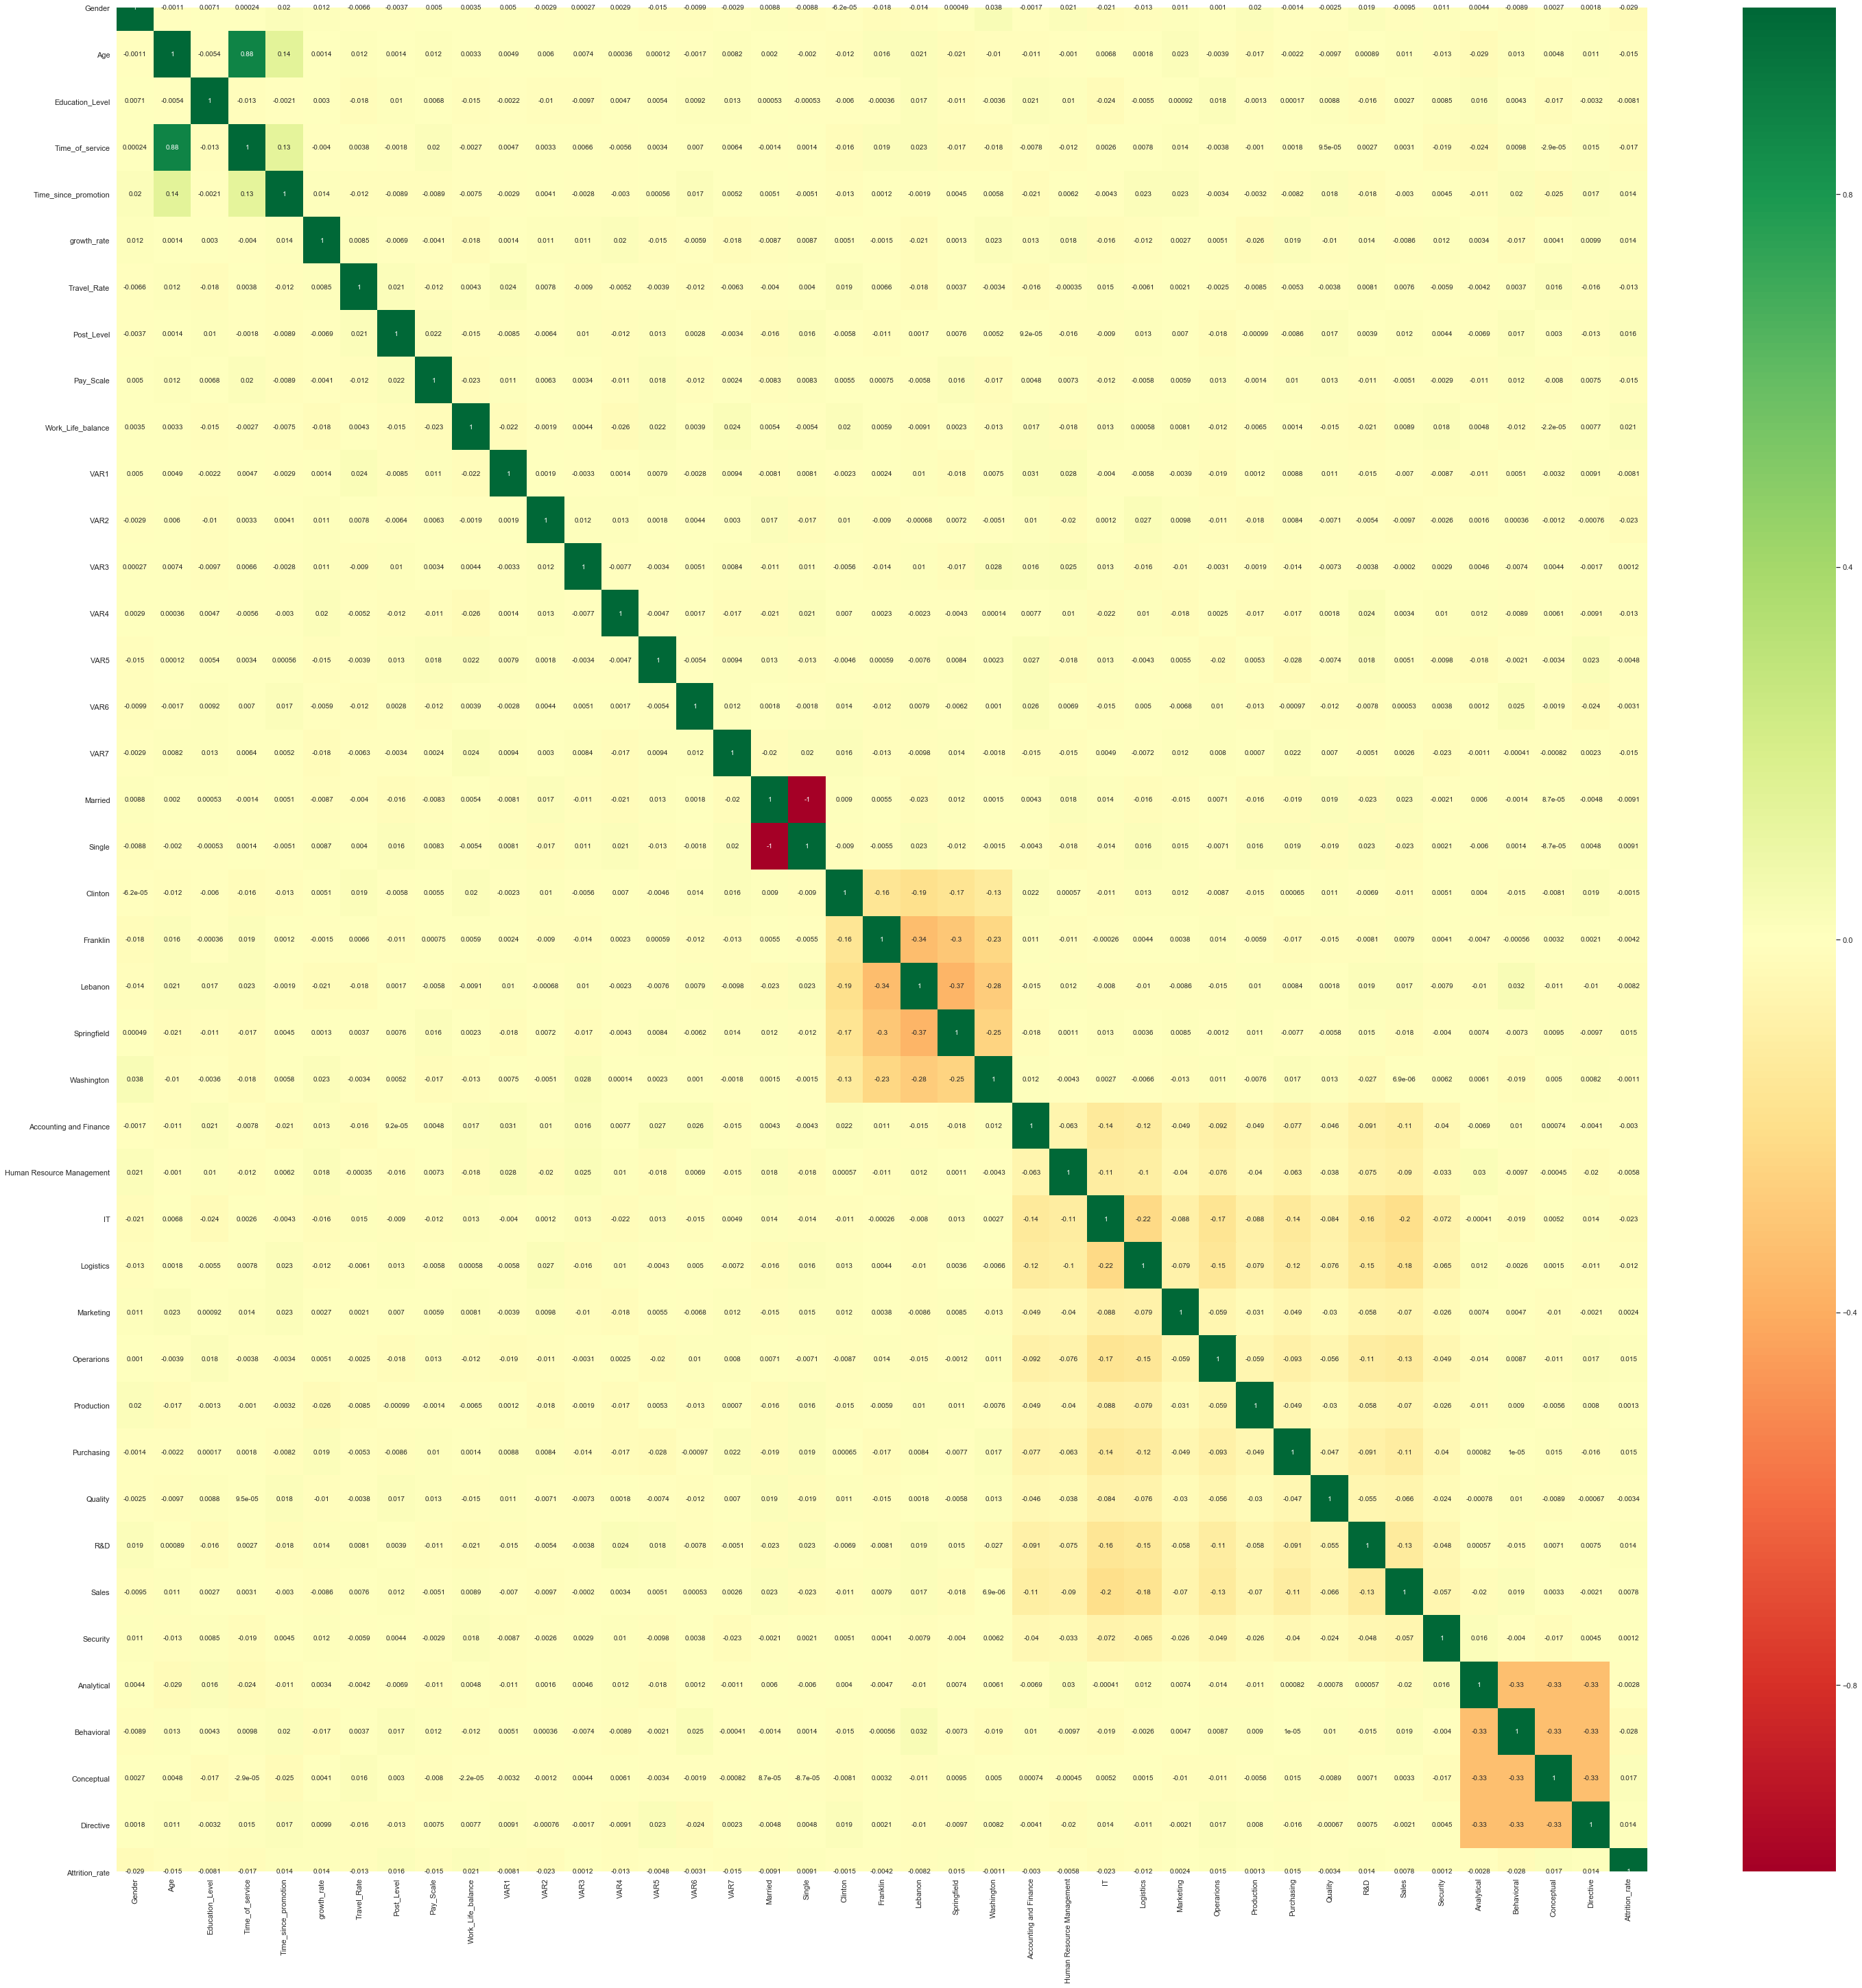

In [16]:
#get correlations of each features in dataset
corrmat = df_filled_NaN_drop_drop_finall.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df_filled_NaN_drop_drop_finall[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
#Setting the set of variables to be used for training after calculating its correlation wrt to the output variable
trainX=df_filled_NaN_drop_drop_finall[['Gender','Time_of_service','Post_Level','Pay_Scale','Work_Life_balance','VAR2','IT','Behavioral','Conceptual']]

In [18]:
#Setting the set of variables to be used for training after calculating its correlation wrt to the output variable
trainY=df_filled_NaN_drop_drop_final['Attrition_rate']

## Hyperparameter Tuning

In [19]:
#Creating a instance of xgb
model = xgb.XGBRegressor()

In [20]:
#Hyper parmater tuning to find the best parameter for the set of features selected above
parameters = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30], #so called `eta` value
              'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
              'min_child_weight': [ 1, 3, 5, 7],
              "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

xgb_grid = GridSearchCV(model,
                        parameters,
                        n_jobs=-1,cv=5,verbose=3)

xgb_grid.fit(trainX,
         trainY)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

[23:56:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-0.0005805961361441403
{'colsample_bytree': 0.4, 'gamma': 0.4, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 5}


In [21]:
#Checking the best set of hyperparamters
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [22]:
#Initializing model with best hyperparameters
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [23]:
#Cross validation score
score=cross_val_score(model,trainX,trainY,cv=10)

[23:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:57:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:57:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:57:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [24]:
score

array([-5.91541165e-05,  5.44680684e-04, -3.18673131e-03, -8.22966010e-04,
       -7.16930051e-04, -1.73451080e-03, -1.78420335e-03, -3.80040723e-04,
       -5.77994891e-03,  4.31382602e-04])

In [25]:
score.mean()

-0.0013488421987689736

In [26]:
#Training of the model
model.fit(trainX,trainY)

[23:57:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [27]:
df_test=pd.read_csv('Test.csv')

In [28]:
#Preparing test data
df_test=df_test.fillna(df_test.median())
df_test_dummies=pd.get_dummies(df_test['Compensation_and_Benefits'])
df_test=df_test.join(df_test_dummies)
df_test['Gender']=df_test['Gender'].map({'F':1,'M':0})
df_dummies_marital=pd.get_dummies(df_test['Relationship_Status'])
df_test=df_test.join(df_dummies_marital)
df_filled_NaN_test_drop=df_test.drop('Compensation_and_Benefits',axis=1)
df_filled_NaN_test_drop=df_filled_NaN_test_drop.drop('Relationship_Status',axis=1)
df_dummies_test_home=pd.get_dummies(df_filled_NaN_test_drop['Hometown'])
df_dummies_test_unit=pd.get_dummies(df_filled_NaN_test_drop['Unit'])
df_dummies_test_decision=pd.get_dummies(df_filled_NaN_test_drop['Decision_skill_possess'])
df_filled_NaN_test_drop_drop=df_filled_NaN_test_drop.join([df_dummies_test_home,df_dummies_test_unit,df_dummies_test_decision])
df_filled_NaN_drop_drop_test_final=df_filled_NaN_test_drop_drop.drop(['Hometown','Unit','Decision_skill_possess'],axis=1)

In [29]:
testX=df_filled_NaN_drop_drop_test_final[['Gender','Time_of_service','Post_Level','Pay_Scale','Work_Life_balance','VAR2','IT','Behavioral','Conceptual']]

In [30]:
#Making predictions and storing it
predictions=model.predict(testX)
df_final=pd.DataFrame(df_test['Employee_ID'])
predication_xg_df=pd.DataFrame(predictions)
df_final['Attrition_rate']=predication_xg_df
df_final.to_csv('submission.csv',index=False)